In [91]:
import numpy as np
import pandas as pd
import re
import scipy
from googletrans import Translator
from langdetect import detect

In [92]:
from urllib.request import urlopen, Request
from bs4 import BeautifulSoup

In [93]:
#url = 'https://zorgvlied.amstelveen.nl/over-zorgvlied/publicatie/gebouwen-op-zorgvlied_crematorion' #foreign lang example
url = 'https://www.sdfgroup.com/en/about-sdf/profile' #good example
#url = 'https://bluelobster.ch/' #good example for translated websites
#url = 'https://wainanisup.com/' #good example
#url = 'https://thecomputerguy.bz/'
#html = urlopen(url)

In [94]:
req = Request(url, headers={'User-Agent': 'Mozilla/5.0 (Windows NT 6.1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/41.0.2228.0 Safari/537.36'})

web_byte = urlopen(req).read()

html = web_byte.decode('utf-8')

In [95]:
soup = BeautifulSoup(html, 'lxml')

In [96]:
#li = soup.select_one('title').text
#title = re.sub('(\\d|\\W)+',' ',li)
#title

In [97]:
for i in soup.find_all('p'):
    print(i.get_text())

Our mission is to supply customers worldwide with tractors, diesel engines and agricultural equipment of acknowledged reliability, quality and performance. Our strategy is focused on improving both productivity and the well-being of the end users.
 
SDF is one of the world's leading manufacturers of tractors, harvesting machines and diesel engines. It distributes products through the SAME, DEUTZ-FAHR, Lamborghini Trattori, Hürlimann and Grégoire.
The company has its headquarters in North Italy, in Treviglio (BG), in an area where the business was established in 1927, when Francesco and Eugenio Cassani developed the Cassani tractor, one of the world's first tractors with a diesel engine.
Production, sales, after-sales and the distribution of spare parts are overseen by eight production sites (in Europe and Asia), 12 sales subsidiaries (in Europe and Asia), one joint venture in China and one in Russia, 155 importers and over 3,100 dealers around the world.
The Company's strategy is based

In [98]:
list = []
for i in soup.find_all('p'):
    df = i.text
    list.append(df)

In [99]:
translator = Translator()
list = ' '.join(list)
if detect(list) == 'en':
    dataset = pd.DataFrame([list], columns = ['abstract1'])
    print('dfd2')
else:
    list = translator.translate(list).text
    #print(list)
    dataset = pd.DataFrame([list], columns = ['abstract1'])
    print('dfd1')

dfd2


In [100]:
dataset.abstract1 = dataset.abstract1.str.strip()

In [101]:
dataset['word count'] = dataset['abstract1'].apply(len)
dataset

,abstract1,word count
0,Our mission is to supply customers worldwide w...,1357


In [102]:
#fetch word count for each abstract

In [103]:
dataset['word count'].describe()

count       1.0
mean     1357.0
std         NaN
min      1357.0
25%      1357.0
50%      1357.0
75%      1357.0
max      1357.0
Name: word count, dtype: float64

In [104]:
#most common and uncommon words

In [105]:
freq = pd.Series(''.join(dataset['abstract1']).split()).value_counts()[:10]
freq

and       14
the       10
of         8
in         7
on         6
one        4
an         4
is         4
its        3
diesel     3
dtype: int64

In [106]:
not_freq = pd.Series(''.join(dataset['abstract1']).split()).value_counts()[-10:]
not_freq

products        1
well-being      1
extensive       1
more            1
through         1
1,268           1
million         1
acknowledged    1
emerging        1
when            1
dtype: int64

# Text Pre-processing

In [107]:
from nltk.stem.porter import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

In [108]:
lem = WordNetLemmatizer()
stem = PorterStemmer()

In [109]:
#Libraries for text prepocessing

In [110]:
import re
import nltk
#nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from nltk.stem.wordnet import WordNetLemmatizer

In [111]:
#Creating a list of stop words and adding custom stopwords
stop_words = set(stopwords.words('english'))

In [112]:
#Creating a list of custom stopwords
new_words = ['using','show','result','large','also','iv','one','two','new','previously','shown','arrow', 'left', 'right',
            'space', 'command', 'toggle', 'cookies', 'include', 'detail', 'configure', 'name', 'last', 'phone', 'location']
stop_words = stop_words.union(new_words)

In [113]:
corpus = []
for i in range(len(dataset)):
    #Removing puncuations
    text = re.sub('[^a-zA-Z]', ' ', dataset['abstract1'][i])
    
    #convert to lowecase
    text = text.lower()
    
    #remove tags
    text = re.sub('&lt;/?.*?&gt;',' &lt;&gt; ',text)
    
    #remove special characters and digits
    text = re.sub('(\\d|\\W)+',' ',text)
    
    #Convert to list from string
    text = text.split()
    
    #Stemming
    ps = PorterStemmer()
    
    #Lemmatization
    lem = WordNetLemmatizer()
    text = [lem.lemmatize(word) for word in text if word not in stop_words]
    text = ' '.join(text)
    corpus.append(text)

In [114]:
#view a corpus item
corpus

['mission supply customer worldwide tractor diesel engine agricultural equipment acknowledged reliability quality performance strategy focused improving productivity well end user sdf world leading manufacturer tractor harvesting machine diesel engine distributes product deutz fahr lamborghini trattori h rlimann gr goire company headquarters north italy treviglio bg area business established francesco eugenio cassani developed cassani tractor world first tractor diesel engine production sale sale distribution spare part overseen eight production site europe asia sale subsidiary europe asia joint venture china russia importer dealer around world company strategy based offering extensive product range expanding sale network key emerging market giving production capacity international dimension overseeing technological know internally developing core component sdf employee company recorded revenue million ebitda']

In [115]:
#frequently used words(after noise removal)
freq = pd.Series(''.join(corpus).split()).value_counts()[:10]
freq

sale          4
tractor       4
world         3
production    3
diesel        3
company       3
engine        3
product       2
europe        2
sdf           2
dtype: int64

# Data Exploration

In [116]:
#creating a word cloud to get an insight of the most commonly used words

In [117]:
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
%matplotlib inline

In [118]:
wordcloud = WordCloud(background_color='black',stopwords=stop_words,max_words=200,max_font_size=50,random_state=42).generate(str(corpus))

<Figure size 432x288 with 0 Axes>

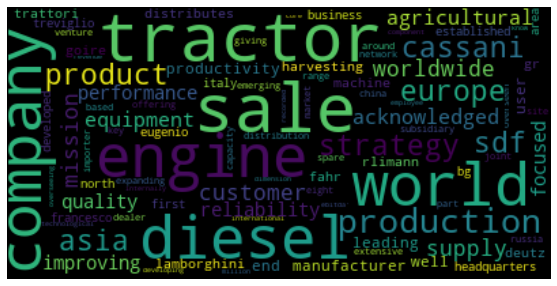

In [119]:
print(wordcloud)
fig = plt.figure(1)
plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()
fig.savefig('wordcloud.png', dpi=900)

# Text preparation

In [120]:
#we are gonna use tokenisation and vectorisation

In [121]:
#creating a vector for word counts

In [122]:
from sklearn.feature_extraction.text import CountVectorizer
import re

In [123]:
cv=CountVectorizer(max_df=1.0,stop_words=stop_words, max_features=10000, ngram_range=(1,3))
X=cv.fit_transform(corpus)

In [124]:
#an encoded vector is returned with a length of the entire vocabulary

In [125]:
#list(cv.vocabulary_.keys())[:10]

# Visualize top N uni, bi and tri-grams

[Text(0, 0, 'tractor'),
 Text(0, 0, 'sale'),
 Text(0, 0, 'diesel'),
 Text(0, 0, 'engine'),
 Text(0, 0, 'world'),
 Text(0, 0, 'company'),
 Text(0, 0, 'production'),
 Text(0, 0, 'strategy'),
 Text(0, 0, 'sdf'),
 Text(0, 0, 'product'),
 Text(0, 0, 'cassani'),
 Text(0, 0, 'europe'),
 Text(0, 0, 'asia'),
 Text(0, 0, 'mission'),
 Text(0, 0, 'supply'),
 Text(0, 0, 'customer'),
 Text(0, 0, 'worldwide'),
 Text(0, 0, 'agricultural'),
 Text(0, 0, 'equipment'),
 Text(0, 0, 'acknowledged')]

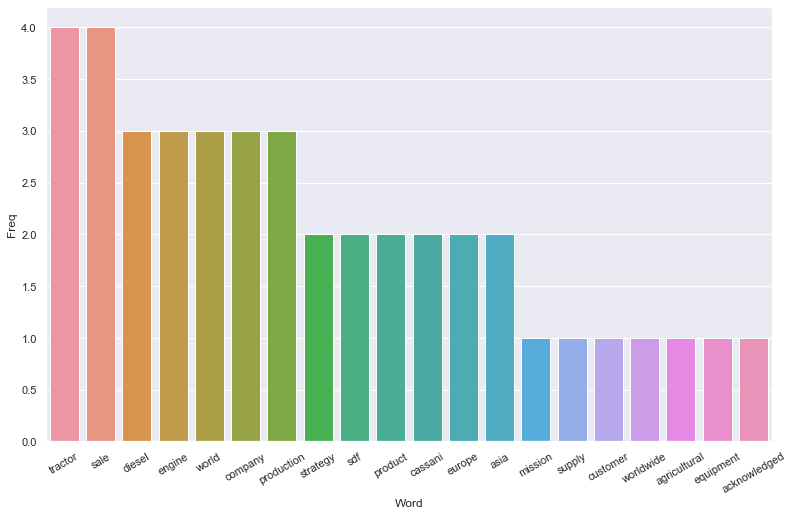

In [126]:
#Most frequently occuring words
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in      
                   vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                       reverse=True)
    return words_freq[:n]
#Convert most freq words to dataframe for plotting bar plot
top_words = get_top_n_words(corpus, n=20)
top_df = pd.DataFrame(top_words)
top_df.columns=["Word", "Freq"]
#Barplot of most freq words
import seaborn as sns
sns.set(rc={'figure.figsize':(13,8)})
g = sns.barplot(x="Word", y="Freq", data=top_df)
g.set_xticklabels(g.get_xticklabels(), rotation=30)

                     Bi-gram  Freq
0              diesel engine     3
1             tractor diesel     2
2                europe asia     2
3             mission supply     1
4            supply customer     1
5         customer worldwide     1
6          worldwide tractor     1
7        engine agricultural     1
8     agricultural equipment     1
9     equipment acknowledged     1
10  acknowledged reliability     1
11       reliability quality     1
12       quality performance     1
13      performance strategy     1
14          strategy focused     1
15         focused improving     1
16    improving productivity     1
17         productivity well     1
18                  well end     1
19                  end user     1


[Text(0, 0, 'diesel engine'),
 Text(0, 0, 'tractor diesel'),
 Text(0, 0, 'europe asia'),
 Text(0, 0, 'mission supply'),
 Text(0, 0, 'supply customer'),
 Text(0, 0, 'customer worldwide'),
 Text(0, 0, 'worldwide tractor'),
 Text(0, 0, 'engine agricultural'),
 Text(0, 0, 'agricultural equipment'),
 Text(0, 0, 'equipment acknowledged'),
 Text(0, 0, 'acknowledged reliability'),
 Text(0, 0, 'reliability quality'),
 Text(0, 0, 'quality performance'),
 Text(0, 0, 'performance strategy'),
 Text(0, 0, 'strategy focused'),
 Text(0, 0, 'focused improving'),
 Text(0, 0, 'improving productivity'),
 Text(0, 0, 'productivity well'),
 Text(0, 0, 'well end'),
 Text(0, 0, 'end user')]

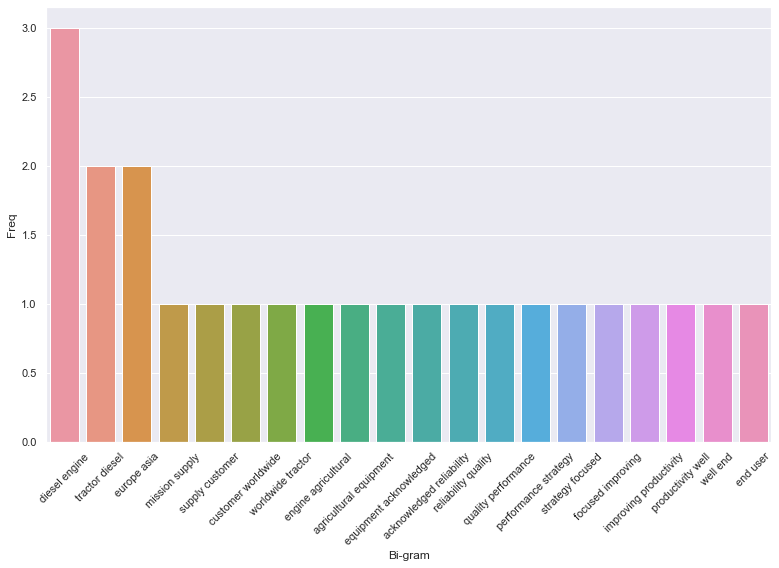

In [127]:
#Most frequently occuring Bi-grams
def get_top_n2_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(2,2),  
            max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]
top2_words = get_top_n2_words(corpus, n=20)
top2_df = pd.DataFrame(top2_words)
top2_df.columns=["Bi-gram", "Freq"]
print(top2_df)
#Barplot of most freq Bi-grams
import seaborn as sns
sns.set(rc={'figure.figsize':(13,8)})
h=sns.barplot(x="Bi-gram", y="Freq", data=top2_df)
h.set_xticklabels(h.get_xticklabels(), rotation=45)

                               Tri-gram  Freq
0                 tractor diesel engine     2
1               mission supply customer     1
2             supply customer worldwide     1
3            customer worldwide tractor     1
4              worldwide tractor diesel     1
5            diesel engine agricultural     1
6         engine agricultural equipment     1
7   agricultural equipment acknowledged     1
8    equipment acknowledged reliability     1
9      acknowledged reliability quality     1
10      reliability quality performance     1
11         quality performance strategy     1
12         performance strategy focused     1
13           strategy focused improving     1
14       focused improving productivity     1
15          improving productivity well     1
16                productivity well end     1
17                        well end user     1
18                         end user sdf     1
19                       user sdf world     1


[Text(0, 0, 'tractor diesel engine'),
 Text(0, 0, 'mission supply customer'),
 Text(0, 0, 'supply customer worldwide'),
 Text(0, 0, 'customer worldwide tractor'),
 Text(0, 0, 'worldwide tractor diesel'),
 Text(0, 0, 'diesel engine agricultural'),
 Text(0, 0, 'engine agricultural equipment'),
 Text(0, 0, 'agricultural equipment acknowledged'),
 Text(0, 0, 'equipment acknowledged reliability'),
 Text(0, 0, 'acknowledged reliability quality'),
 Text(0, 0, 'reliability quality performance'),
 Text(0, 0, 'quality performance strategy'),
 Text(0, 0, 'performance strategy focused'),
 Text(0, 0, 'strategy focused improving'),
 Text(0, 0, 'focused improving productivity'),
 Text(0, 0, 'improving productivity well'),
 Text(0, 0, 'productivity well end'),
 Text(0, 0, 'well end user'),
 Text(0, 0, 'end user sdf'),
 Text(0, 0, 'user sdf world')]

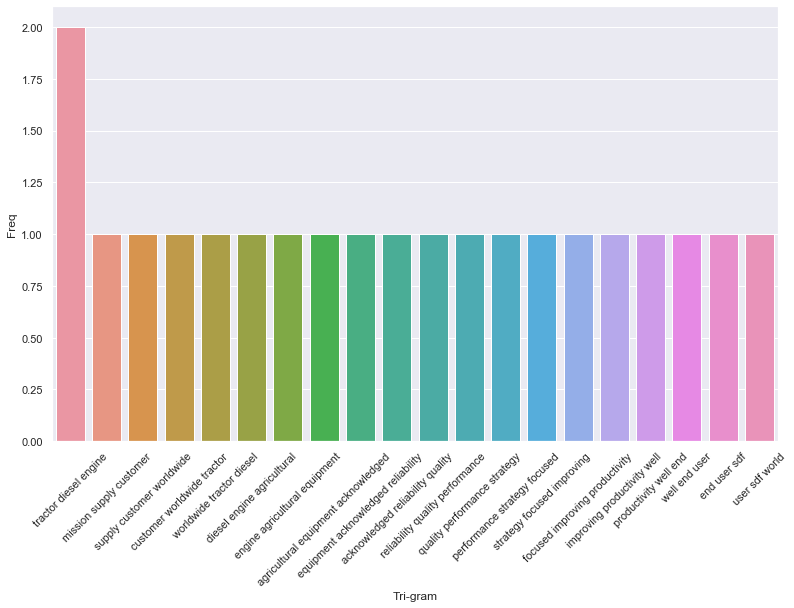

In [128]:
#Most frequently occuring Tri-grams
def get_top_n3_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(3,3), 
           max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]
top3_words = get_top_n3_words(corpus, n=20)
top3_df = pd.DataFrame(top3_words)
top3_df.columns=["Tri-gram", "Freq"]
print(top3_df)
#Barplot of most freq Tri-grams
import seaborn as sns
sns.set(rc={'figure.figsize':(13,8)})
j=sns.barplot(x="Tri-gram", y="Freq", data=top3_df)
j.set_xticklabels(j.get_xticklabels(), rotation=45)

# Using TF-IDF

In [129]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidf_transformer = TfidfTransformer(smooth_idf=True, use_idf=True)
tfidf_transformer.fit(X)

#get feature names
feature_names = cv.get_feature_names()

#fetch document for which keywords needs to be extracted
doc = corpus[0]

#generate tf-idf for the given document
tf_idf_vector = tfidf_transformer.transform(cv.transform([doc]))

In [130]:
#Based on the TF-IDF scores, we can extract the words with the highest scores to get the keywords for a document.

In [131]:
#Function for sorting tf_idf in descending order
from scipy.sparse import coo_matrix
def sort_coo(coo_matrix):
    tuples = zip(coo_matrix.col, coo_matrix.data)
    return sorted(tuples, key=lambda x: (x[1], x[0]), reverse=True)
 
def extract_topn_from_vector(feature_names, sorted_items, topn=10):
    """get the feature names and tf-idf score of top n items"""
    
    #use only topn items from vector
    sorted_items = sorted_items[:topn]
 
    score_vals = []
    feature_vals = []
    
    # word index and corresponding tf-idf score
    for idx, score in sorted_items:
        
        #keep track of feature name and its corresponding score
        score_vals.append(round(score, 3))
        feature_vals.append(feature_names[idx])
 
    #create a tuples of feature,score
    #results = zip(feature_vals,score_vals)
    results= {}
    for idx in range(len(feature_vals)):
        results[feature_vals[idx]]=score_vals[idx]
    
    return results
#sort the tf-idf vectors by descending order of scores
sorted_items=sort_coo(tf_idf_vector.tocoo())
#extract only the top n; n here is 5
keywords=extract_topn_from_vector(feature_names,sorted_items,5)
 
# now print the results
print("\nAbstract:")
print(doc)
print("\nKeywords:")
for k in keywords:
    print(k,keywords[k])
    


Abstract:
mission supply customer worldwide tractor diesel engine agricultural equipment acknowledged reliability quality performance strategy focused improving productivity well end user sdf world leading manufacturer tractor harvesting machine diesel engine distributes product deutz fahr lamborghini trattori h rlimann gr goire company headquarters north italy treviglio bg area business established francesco eugenio cassani developed cassani tractor world first tractor diesel engine production sale sale distribution spare part overseen eight production site europe asia sale subsidiary europe asia joint venture china russia importer dealer around world company strategy based offering extensive product range expanding sale network key emerging market giving production capacity international dimension overseeing technological know internally developing core component sdf employee company recorded revenue million ebitda

Keywords:
tractor 0.196
sale 0.196
world 0.147
production 0.147
eng

In [132]:
keywords_df = pd.DataFrame.from_dict(keywords, orient = 'index').reset_index().drop(0, axis = 1)

In [133]:
keywords_df

,index
0,tractor
1,sale
2,world
3,production
4,engine


In [134]:
wordcloud = WordCloud(background_color='white',stopwords=stop_words,max_words=20,max_font_size=50,random_state=42).generate(str(keywords_df).replace('index', ''))

<Figure size 936x576 with 0 Axes>

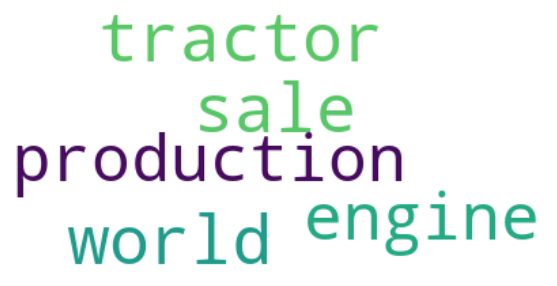

In [135]:
print(wordcloud)
fig = plt.figure(1)
plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()
fig.savefig('wordcloud_1.png', dpi=900)